<a href="https://colab.research.google.com/github/BMateusSs/Projeto-PISI3/blob/main/resultado_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies as needed:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "winemag-data-130k-v2.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zynicide/wine-reviews",
  file_path
)

/tmp/ipython-input-1-1525670069.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [ ]:
# Retirar linhas incompletas
df.dropna(axis="index", how= "any", subset=["price", "points", "region_1", "country", "variety", "designation"], inplace=True)
final_lines_quantity = len(df["description"])
print(final_lines_quantity)

70175


In [ ]:
# Se for feito a limpeza das descrições para tirar stop words e pontuação
# sentence transformer já lida com o stop words e pontuação
import nltk
from nltk.corpus import stopwords
import string

# Baixe as stopwords se ainda não as tiver
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Converter para lowercase
    text = text.lower()
    # Remover pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remover stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Aplicar a função de limpeza na coluna 'description'
df['description'] = df['description'].apply(clean_text)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3,3,US,pineapple rind lemon pith orange blossom start...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,much like regular bottling 2012 comes across r...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,blackberry raspberry aromas show typical navar...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,heres bright informal red opens aromas candied...,Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,9,France,great depth flavor fresh apple pear fruits tou...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [ ]:
# Funções de escrita e leitura de arquivos numpy
import numpy as np
def write_numpy_file(write_path, content):
    np.save(write_path, content)

def read_numpy_file(read_path):
    return np.load(read_path)

# Funções de escrita e leitura de arquivos CSV
import numpy as np
import pandas as pd

def write_embeddings_csv(write_path: str, embeddings_array: np.ndarray):
    """Salva um array numpy de embeddings em um arquivo CSV."""
    # Converter o array numpy para um DataFrame pandas para facilitar o salvamento em CSV
    df_embeddings = pd.DataFrame(embeddings_array)
    # Salvar o DataFrame em CSV. index=False para não salvar o índice do DataFrame como coluna.
    df_embeddings.to_csv(write_path, index=False)
    print(f"Embeddings salvos como CSV em: {write_path}")


def read_embeddings_csv(read_path: str) -> np.ndarray:
    """Lê embeddings de um arquivo CSV e retorna como um array numpy."""
    # Ler o arquivo CSV para um DataFrame pandas
    df_embeddings = pd.read_csv(read_path)
    # Converter o DataFrame de volta para um array numpy
    embeddings_array = df_embeddings.values
    print(f"Embeddings lidos de CSV: {read_path}")
    return embeddings_array

In [ ]:
#Ler emdebddings 2d
# Funções de escrita e leitura de arquivos CSV (mantenha essas funções definidas)
import numpy as np
import pandas as pd
import gdown
import os

# Mantenha a definição da função read_embeddings_csv
def read_embeddings_csv(read_path: str) -> np.ndarray:
    """Lê embeddings de um arquivo CSV e retorna como um array numpy."""
    # Ler o arquivo CSV para um DataFrame pandas
    df_embeddings = pd.read_csv(read_path)
    # Converter o DataFrame de volta para um array numpy
    embeddings_array = df_embeddings.values
    print(f"Embeddings lidos de CSV: {read_path}")
    return embeddings_array

# --- Agora, use o link do Google Drive para baixar e carregar ---

# Define o link do Google Drive para o arquivo CSV
# Gdown geralmente consegue lidar com o link 'sharing', mas o formato 'uc' é mais robusto para download direto.
# Vamos extrair o ID do link e usar o formato 'uc'.
drive_link = "https://drive.google.com/file/d/11-6rZ7TXr5Gato7iIkBHv8XYy5ScNqMx/view?usp=sharing"

# Extrair o ID do arquivo do link
# O ID está entre '/d/' e '/view'
drive_file_id = drive_link.split('/d/')[1].split('/view')[0]

# Construir o URL de download direto usando o ID
download_url = f"https://drive.google.com/uc?id={drive_file_id}"

# Define o caminho de saída onde o arquivo será salvo temporariamente no Colab
output_csv_path = "downloaded_embeddings_2d.csv"

print(f"Tentando baixar o arquivo do Google Drive ID: {drive_file_id}")

try:
    # Baixar o arquivo CSV usando gdown
    gdown.download(download_url, output_csv_path, quiet=False)
    print(f"Arquivo baixado com sucesso para {output_csv_path}")

    # Carregar o arquivo CSV baixado usando a função definida
    embeddings_2d = read_embeddings_csv(output_csv_path)

    print(f"Dados carregados na variável embeddings_2d. Forma: {embeddings_2d.shape}")

    # Opcional: remover o arquivo CSV baixado para liberar espaço
    # os.remove(output_csv_path)
    # print(f"Arquivo temporário {output_csv_path} removido.")

except Exception as e:
    print(f"Ocorreu um erro durante o download ou carregamento do CSV: {e}")
    print("Por favor, verifique se o link do Google Drive está correto e o arquivo é acessível (compartilhado).")

print(len(embeddings_2d))
# Agora a variável 'embeddings_2d' deve conter os dados carregados do CSV.
# Você pode continuar com as etapas de K-Means, etc., usando 'embeddings_2d'.

Tentando baixar o arquivo do Google Drive ID: 11-6rZ7TXr5Gato7iIkBHv8XYy5ScNqMx


Downloading...
From: https://drive.google.com/uc?id=11-6rZ7TXr5Gato7iIkBHv8XYy5ScNqMx
To: /content/downloaded_embeddings_2d.csv
100%|██████████| 1.43M/1.43M [00:00<00:00, 105MB/s]

Arquivo baixado com sucesso para downloaded_embeddings_2d.csv
Embeddings lidos de CSV: downloaded_embeddings_2d.csv
Dados carregados na variável embeddings_2d. Forma: (70175, 2)
70175


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# --- 1. Padroniza os Dados ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(embeddings_2d)
print("\nDados padronizados com o StandardScaler.")


Dados padronizados com o StandardScaler.



Gráfico do Método do Cotovelo salvo como 'elbow_method.png'
K ótimo escolhido: 4
-> K-Means com 4 clusters treinado.


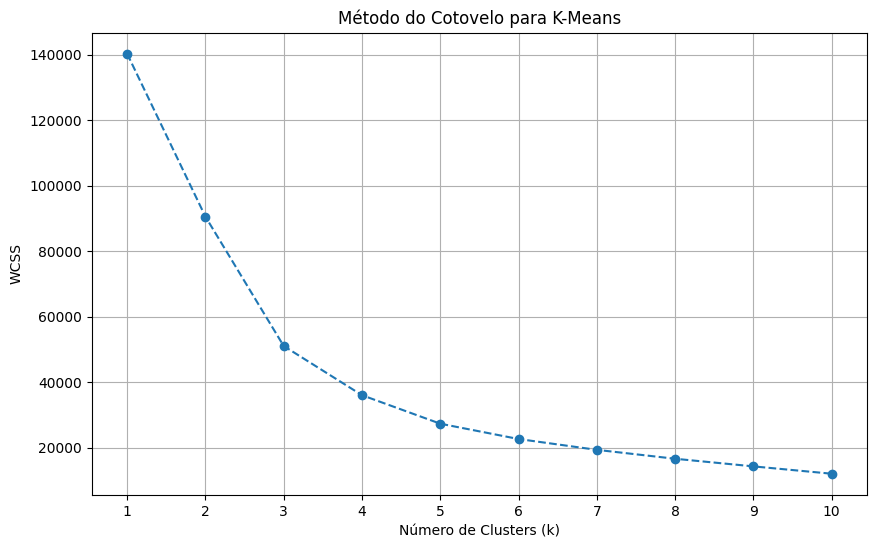

In [ ]:
# --- 3. Elbow Method para KMeans ---
wcss = []
k_range = range(1, 11)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para K-Means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('elbow_method.png')
print("\nGráfico do Método do Cotovelo salvo como 'elbow_method.png'")

# --- 4. Clustering ---
optimal_k = 4
print(f"K ótimo escolhido: {optimal_k}")

kmeans_labels = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10).fit_predict(X_scaled)
print(f"-> K-Means com {optimal_k} clusters treinado.")

In [ ]:
dbscan = DBSCAN(eps=0.125, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"-> DBSCAN treinado com {n_clusters_dbscan} clusters.")

-> DBSCAN treinado com 8 clusters.


In [ ]:
gmm_final = GaussianMixture(n_components=20, random_state=42, n_init=10)
clusters_gmm = gmm_final.fit_predict(embeddings_2d)

In [ ]:
# --- 5. Avaliação ---
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

results = {
    'K-Means': {
        'Silhouette': silhouette_score(X_scaled, kmeans_labels),
        'Davies-Bouldin': davies_bouldin_score(X_scaled, kmeans_labels),
        'Calinski-Harabasz': calinski_harabasz_score(X_scaled, kmeans_labels)
    },
    'DBSCAN': {
        'Silhouette': silhouette_score(X_scaled, dbscan_labels) if n_clusters_dbscan > 1 else 'N/A',
        'Davies-Bouldin': davies_bouldin_score(X_scaled, dbscan_labels) if n_clusters_dbscan > 1 else 'N/A',
        'Calinski-Harabasz': calinski_harabasz_score(X_scaled, dbscan_labels) if n_clusters_dbscan > 1 else 'N/A'
    }
    ,
    'GMM': {
        'Silhouette': silhouette_score(X_scaled, clusters_gmm),
        'Davies-Bouldin': davies_bouldin_score(X_scaled, clusters_gmm),
        'Calinski-Harabasz': calinski_harabasz_score(X_scaled, clusters_gmm)
    }
}

In [ ]:
# --- 6. Mostra Resultados ---
df_results = pd.DataFrame(results).T
print("\n" + "="*60)
print("       TABELA COMPARATIVA DE MÉTRICAS DE CLUSTERIZAÇÃO")
print("="*60)
print(df_results.to_string())
print("="*60)


       TABELA COMPARATIVA DE MÉTRICAS DE CLUSTERIZAÇÃO
         Silhouette  Davies-Bouldin  Calinski-Harabasz
K-Means    0.450822        0.792272       67703.726906
DBSCAN    -0.235374        0.712021        1654.024481
GMM        0.383839        0.832541       70240.680412
